# Late Fusion Transformer Model - CMU-MOSI

In [ ]:
!git clone https://github.com/M-Jafarkhani/Multimodal-Emotion-Recognition

In [3]:
import gdown

file_id = "1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit"
destination = "mosi_data.pkl"  

gdown.download(
    f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit
From (redirected): https://drive.google.com/uc?id=1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit&confirm=t&uuid=98f2ddaf-ea7b-4aa2-8148-47ddf4e0c3b9
To: /content/mosi_data.pkl
100%|██████████| 154M/154M [00:01<00:00, 91.5MB/s]


'mosi_data.pkl'

## Importing Libraries

In [4]:
import sys
import torch
import matplotlib.pyplot as plt

sys.path.append('/content/Multimodal-Emotion-Recognition/src')

## Importing Helper Functions

In [5]:
from loader import get_dataloader
from unimodals.modules import Transformer, MLP
from training.supervised import train, test
from fusions.modules import Concat
from utils import get_default_device, save_results

## Loading the Dataset

In [7]:
FILE_PATH = '/content/mosi_data.pkl'
train_data, valid_data, test_data = get_dataloader(FILE_PATH)

In [9]:
device = get_default_device()
print(device)

cuda


## Model Architecture

In [11]:
encoders = [
    Transformer(20, 40).to(device),
    Transformer(5, 10).to(device),
    Transformer(300, 600).to(device),
]
head = MLP(650, 256, 1).to(device)
fusion = Concat().to(device)


## Training

In [16]:
OUTPUT_MODEL_FILE_NAME = "MOSI_Late_Fusion_Transformer"
train_losses, valid_losses = train(
    encoders,
    fusion,
    head,
    train_data,
    valid_data,
    100,
    task="regression",
    optimtype=torch.optim.AdamW,
    early_stop=True,
    is_packed=True,
    lr=1e-4,
    save=f'/content/{OUTPUT_MODEL_FILE_NAME}.pt',
    weight_decay=0.01,
    objective=torch.nn.L1Loss(),
)


Epoch [1/100]
Train Loss: 0.9660
Valid Loss: 1.0546
Saving Best

Epoch [2/100]
Train Loss: 0.8290
Valid Loss: 0.9928
Saving Best

Epoch [3/100]
Train Loss: 0.7811
Valid Loss: 1.0703

Epoch [4/100]
Train Loss: 0.7138
Valid Loss: 1.0542

Epoch [5/100]
Train Loss: 0.6512
Valid Loss: 1.0179

Epoch [6/100]
Train Loss: 0.6221
Valid Loss: 0.9216
Saving Best

Epoch [7/100]
Train Loss: 0.6060
Valid Loss: 0.9227

Epoch [8/100]
Train Loss: 0.5537
Valid Loss: 0.9074
Saving Best

Epoch [9/100]
Train Loss: 0.6130
Valid Loss: 0.9044
Saving Best

Epoch [10/100]
Train Loss: 0.5032
Valid Loss: 0.9039
Saving Best

Epoch [11/100]
Train Loss: 0.4804
Valid Loss: 1.0077

Epoch [12/100]
Train Loss: 0.4473
Valid Loss: 0.9227

Epoch [13/100]
Train Loss: 0.4204
Valid Loss: 0.8914
Saving Best

Epoch [14/100]
Train Loss: 0.4085
Valid Loss: 0.9355

Epoch [15/100]
Train Loss: 0.3716
Valid Loss: 0.9496

Epoch [16/100]
Train Loss: 0.3537
Valid Loss: 0.9298

Epoch [17/100]
Train Loss: 0.3541
Valid Loss: 0.9186

Epoch [

Text(0.5, 1.0, 'Loss vs. No. of epochs')

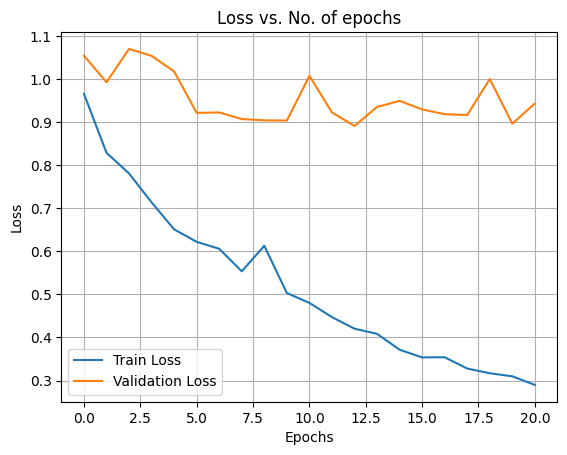

In [17]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [18]:
save_results(train_losses, valid_losses, f'/content/{OUTPUT_MODEL_FILE_NAME}.pkl')

## Testing

In [19]:
model = torch.load(f"/content/{OUTPUT_MODEL_FILE_NAME}.pt").to(device)

test(
    model,
    test_dataloaders_all=test_data,
    is_packed=True,
    criterion=torch.nn.L1Loss(),
    task="posneg-classification"
)


<ipython-input-19-a08912491c6e>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(f'/content/{OUTPUT_MODEL_FILE_NAME}.pt').to(device)


Recall: 73.6280% | Total Accuracy: 73.3236%
Inference Time: 538ms
Inference Params: 20953733
